In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean, median, mode, stdev
import statistics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df=pd.read_csv('/kaggle/input/indian-premier-league-ipl-all-seasons/all_season_summary.csv')
df

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,"Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,...,"Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,...,"Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,...,"Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,...,"Kane Williamson (UKN),Abhishek Sharma (AR),Rah...","Jos Buttler (UKN),Yashasvi Jaiswal (UKN),Sanju...","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",29 March 2022 - night match (20-over match),Ulhas Gandhe,Bruce Oxenford,KN Ananthapadmanabhan,Shakti Singh,Saidharshan Kumar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,2008,336012,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"55th match (D/N), Indian Premier League at Ben...",RCB,MI,MI,BOWL FIRST,122/9,...,"Mark Boucher (BT),Shreevats Goswami (WK),Misba...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",28 May 2008 - day/night match (20-over match),Billy Bowden,Arani Jayaprakash,Billy Doctrove,Sir Clive Lloyd,None
954,2008,336019,Kings XI Punjab v Rajasthan Royals,KXIP v RR,"56th match (N), Indian Premier League at Mohal...",KXIP,RR,RR,BOWL FIRST,221/3,...,"Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...","Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",28 May 2008 - night match (20-over match),Krishna Hariharan,Steve Davis,Daryl Harper,Srinivas Venkataraghavan,MS Mahal
955,2008,336038,Delhi Daredevils v Rajasthan Royals,DC v RR,"1st Semi-Final (N), Indian Premier League at M...",DC,RR,DC,BOWL FIRST,192/9,...,"Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",30 May 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Billy Doctrove,Javagal Srinath,None
956,2008,336039,Chennai Super Kings v Kings XI Punjab,CSK v KXIP,"2nd Semi-Final (N), Indian Premier League at M...",CSK,KXIP,KXIP,BAT FIRST,112/8,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...","Ramesh 

In [3]:
df.info

<bound method DataFrame.info of      season       id                                          name  \
0      2022  1304047   Chennai Super Kings v Kolkata Knight Riders   
1      2022  1304048               Delhi Capitals v Mumbai Indians   
2      2022  1304049    Punjab Kings v Royal Challengers Bangalore   
3      2022  1304050         Gujarat Titans v Lucknow Super Giants   
4      2022  1304051        Sunrisers Hyderabad v Rajasthan Royals   
..      ...      ...                                           ...   
953    2008   336012  Royal Challengers Bangalore v Mumbai Indians   
954    2008   336019            Kings XI Punjab v Rajasthan Royals   
955    2008   336038           Delhi Daredevils v Rajasthan Royals   
956    2008   336039         Chennai Super Kings v Kings XI Punjab   
957    2008   336040        Chennai Super Kings v Rajasthan Royals   

     short_name                                        description home_team  \
0     CSK v KKR  1st Match (N), Indian Premier 

There is 958 rows and 45 columns in IPL summary 2022

In [4]:
df.describe()

,season,id,venue_id,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
count,958.000000,9.580000e+02,958.000000,950.000000,950.000000,950.000000,950.000000,948.000000,948.000000,948.000000,948.000000
mean,2014.973904,8.283838e+05,122107.409186,19.071368,157.129474,5.763158,19.193684,19.051793,154.531646,5.937764,18.847046
std,4.316664,3.376360e+05,147116.606610,2.128892,31.491834,2.409961,5.799455,2.158935,30.879130,2.527845,5.571350
min,2008.000000,3.359820e+05,57851.000000,1.100000,2.000000,0.000000,0.000000,3.200000,41.000000,0.000000,3.000000
25%,2011.000000,5.012592e+05,58008.000000,19.200000,138.000000,4.000000,15.000000,19.100000,136.000000,4.000000,15.000000
50%,2015.000000,8.297340e+05,58162.000000,20.000000,159.000000,6.000000,19.000000,20.000000,156.500000,6.000000,19.000000
75%,2019.000000,1.175370e+06,59120.000000,20.000000,178.000000,8.000000,23.000000,20.000000,175.000000,8.000000,22.000000
max,2022.000000,1.312200e+06,601879.000000,20.000000,263.000000,10.000000,42.000000,20.000000,245.000000,10.000000,39.000000


In [5]:
df.shape

(958, 45)

In [6]:
df.isna().max()

season              False
id                  False
name                False
short_name          False
description         False
home_team           False
away_team           False
toss_won            False
decision            False
1st_inning_score     True
2nd_inning_score     True
home_score           True
away_score           True
winner              False
result              False
start_date          False
end_date            False
venue_id            False
venue_name          False
home_captain        False
away_captain        False
pom                 False
points              False
super_over          False
home_overs           True
home_runs            True
home_wickets         True
home_boundaries      True
away_overs           True
away_runs            True
away_wickets         True
away_boundaries      True
highlights           True
home_key_batsman     True
home_key_bowler      True
home_playx1         False
away_playx1         False
away_key_batsman     True
away_key_bow

In [7]:
df.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [8]:
df.short_name.head(10)

0     CSK v KKR
1       DC v MI
2    PBKS v RCB
3      GT v LSG
4      SRH v RR
5     RCB v KKR
6     LSG v CSK
7    KKR v PBKS
8       MI v RR
9       GT v DC
Name: short_name, dtype: object

In [9]:
df[['home_score','short_name','winner']].head(20)

,home_score,short_name,winner
0,131/5,CSK v KKR,KKR
1,179/6,DC v MI,DC
2,208/5,PBKS v RCB,PBKS
3,161/5,GT v LSG,GT
4,149/7,SRH v RR,RR
5,132/7,RCB v KKR,RCB
6,211/4,LSG v CSK,LSG
7,141/4,KKR v PBKS,KKR
8,170/8,MI v RR,RR
9,171/6,GT v DC,GT


/tmp/ipykernel_20/3272307416.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_20/3272307416.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


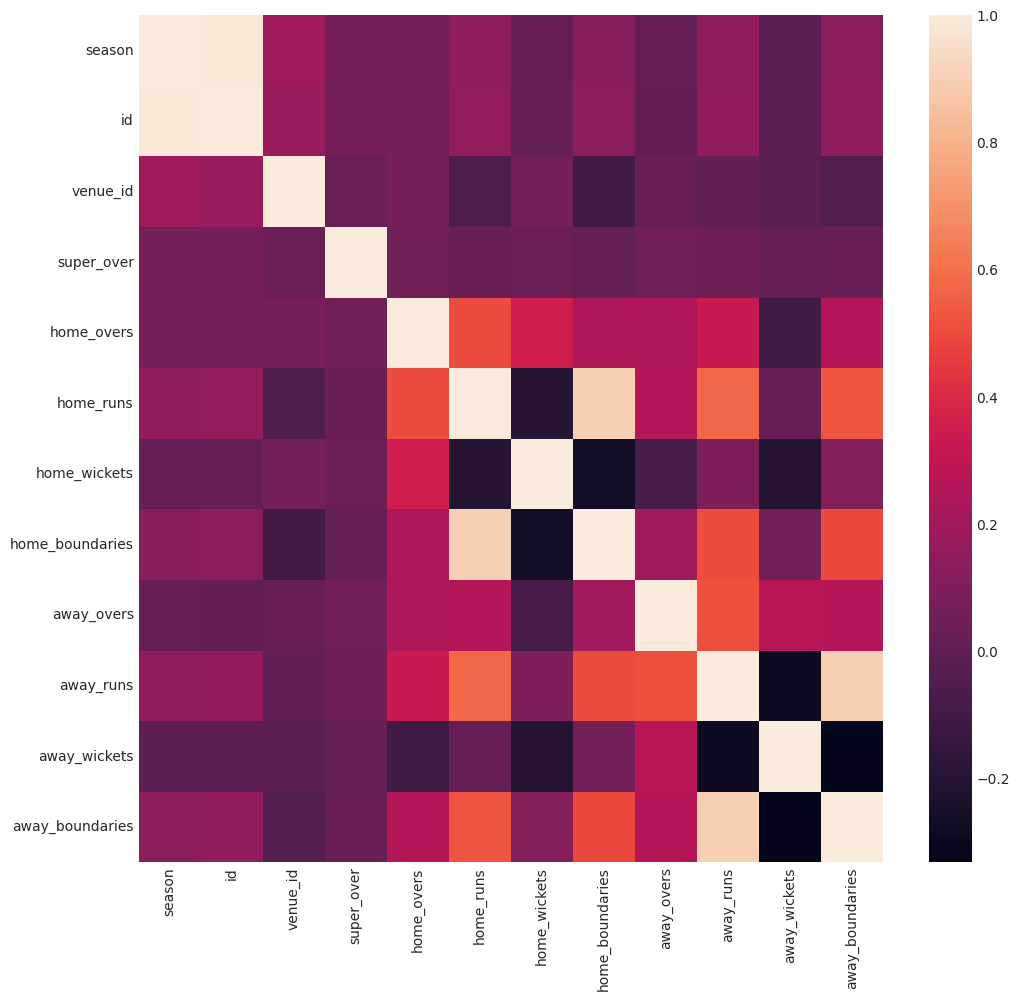

In [10]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 11))
sns.heatmap(df.corr())
plt.show()

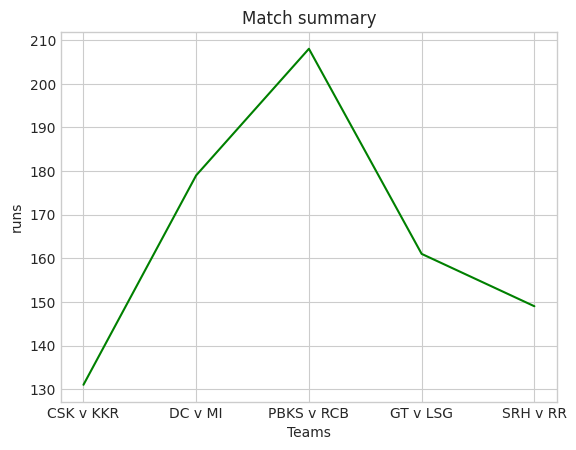

In [11]:
df1=df.head(5)
plt.plot(df1.short_name,df1.home_runs,color='g')
plt.xlabel('Teams')
plt.ylabel('runs')
plt.title('Match summary')
plt.legend(loc='best')
plt.show()

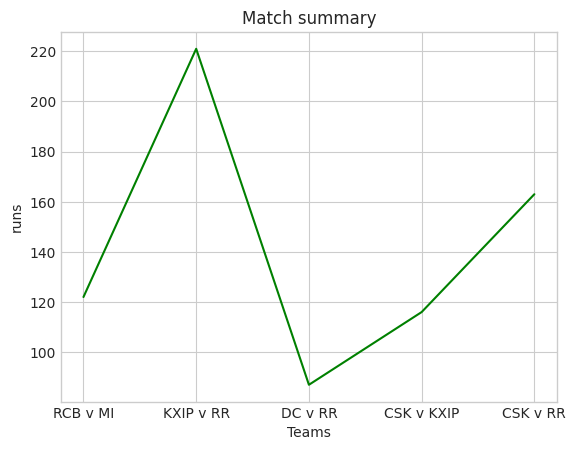

In [12]:
df1=df.tail(5)
plt.plot(df1.short_name,df1.home_runs,color='g')
plt.xlabel('Teams')
plt.ylabel('runs')
plt.title('Match summary')
plt.legend(loc='best')
plt.show()

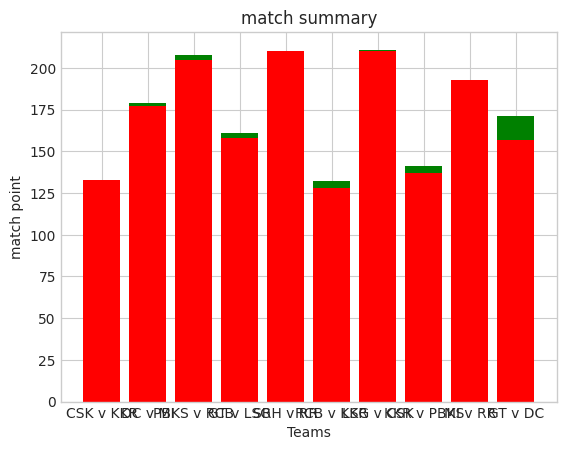

In [13]:
df3=df.head(10)
plt.bar(df3.short_name,df3.home_runs,color='g')
plt.bar(df3.short_name,df3.away_runs,color='r')
plt.xlabel('Teams')
plt.ylabel("match point")
plt.title("match summary")
plt.legend(loc='best')

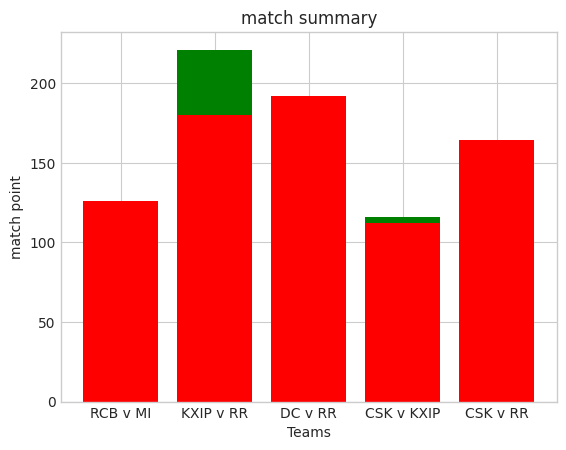

In [14]:
df3=df.tail(5)
plt.bar(df3.short_name,df3.home_runs,color='g')
plt.bar(df3.short_name,df3.away_runs,color='r')
plt.xlabel('Teams')
plt.ylabel("match point")
plt.title("match summary")
plt.legend(loc='best')

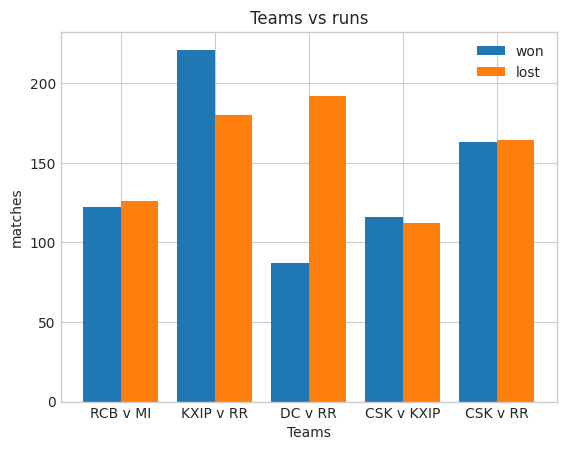

In [15]:
xpos2=np.arange(len(df1.short_name))
plt.xticks(xpos2,df1.short_name)
plt.bar(xpos2-0.2,df1.home_runs,width=0.4,label='won')
plt.bar(xpos2+0.2,df1.away_runs,width=0.4,label='lost')
plt.xlabel('Teams')
plt.ylabel("matches")
plt.title("Teams vs runs")
plt.legend(loc='best')
plt.show()

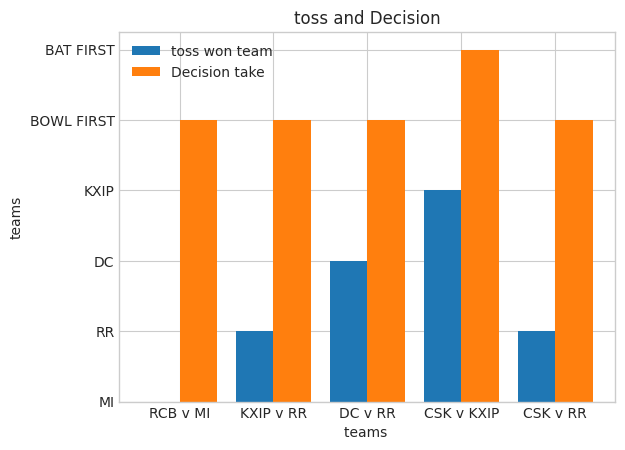

In [16]:
xpos2=np.arange(len(df1.short_name))
plt.xticks(xpos2,df1.short_name)
plt.bar(xpos2-0.2,df1.toss_won,width=0.4,label='toss won team')
plt.bar(xpos2+0.2,df1.decision,width=0.4,label='Decision take')
plt.xlabel('teams ')
plt.ylabel("teams")
plt.title("toss and Decision")
plt.legend(loc='best')
plt.show()

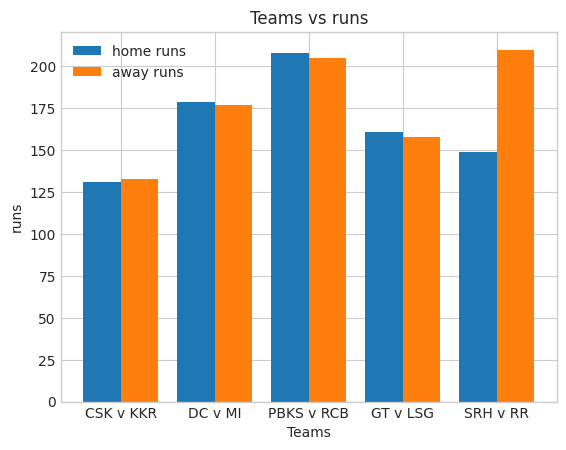

In [17]:
df1=df.head(5)
xpos2=np.arange(len(df1.short_name))
plt.xticks(xpos2,df1.short_name)
plt.bar(xpos2-0.2,df1.home_runs,width=0.4,label='home runs')
plt.bar(xpos2+0.2,df1.away_runs,width=0.4,label='away runs')
plt.xlabel('Teams')
plt.ylabel("runs")
plt.title("Teams vs runs")
plt.legend(loc='best')
plt.show()

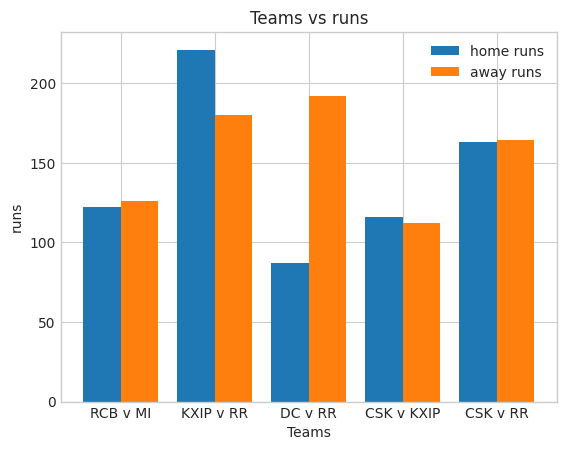

In [18]:
df1=df.tail(5)
xpos2=np.arange(len(df1.short_name))
plt.xticks(xpos2,df1.short_name)
plt.bar(xpos2-0.2,df1.home_runs,width=0.4,label='home runs')
plt.bar(xpos2+0.2,df1.away_runs,width=0.4,label='away runs')
plt.xlabel('Teams')
plt.ylabel("runs")
plt.title("Teams vs runs")
plt.legend(loc='best')
plt.show()